In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
df_train = pd.read_csv("C:/Users/cgdb2/Documents/treino_cars_v1.cs.csv", sep=';')
df_train

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,"1,6 16V FLEXSTART SL 4P XTRONIC",2017,2017,67772,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,"74732,59008"
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,"2,0 16V FLEX LIMITED AUTOMÁTICO",2017,2017,62979,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,"81965,33263"
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,"2,4 16V GASOLINA EX 7L AWD AUTOMÁTICO",2018,2019,44070,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"162824,8145"
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,"2,0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...",2013,2015,85357,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,"123681,3589"
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,"2,0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO",2013,2015,71491,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,"82419,76389"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,40985083650499509711752444068313401704,8.0,TOYOTA,HILUX,"2,8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO",2021,2021,8150,Automática,4,...,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,"403015,2896"
29580,164663177589009976281210123914772747797,8.0,VOLKSWAGEN,POLO,"1,0 200 TSI HIGHLINE AUTOMÁTICO",2020,2020,17987,Automática,4,...,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,"88978,0805"
29581,170866287186047465472146212778882034162,8.0,TOYOTA,HILUX,"2,8 SRX 4X4 CD 16V DIESEL 4P AUTOMÁTICO",2019,2019,44742,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"218807,6487"
29582,208909739337040262669325459666578363437,8.0,PEUGEOT,2008,"1,6 16V FLEX ALLURE PACK 4P AUTOMÁTICO",2021,2022,35376,Automática,4,...,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,"68495,99069"


In [3]:
df_train['preco'] = df_train['preco'].str.replace(',', '.')
df_train['preco'] = pd.to_numeric(df_train['preco'])

In [110]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            29584 non-null  object 
 1   num_fotos                     29407 non-null  float64
 2   marca                         29584 non-null  object 
 3   modelo                        29584 non-null  object 
 4   versao                        29584 non-null  object 
 5   ano_de_fabricacao             29584 non-null  int64  
 6   ano_modelo                    29584 non-null  int64  
 7   hodometro                     29584 non-null  int64  
 8   cambio                        29584 non-null  object 
 9   num_portas                    29584 non-null  int64  
 10  tipo                          29584 non-null  object 
 11  blindado                      29584 non-null  object 
 12  cor                           29584 non-null  object 
 13  t

In [111]:
cat_cols=df_train.select_dtypes(include=['object']).columns
num_cols = df_train.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['id', 'marca', 'modelo', 'versao', 'cambio', 'tipo', 'blindado', 'cor',
       'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor', 'anunciante',
       'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria',
       'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica',
       'revisoes_dentro_agenda'],
      dtype='object')
Numerical Variables:
['num_fotos', 'ano_de_fabricacao', 'ano_modelo', 'hodometro', 'num_portas', 'veiculo_alienado', 'preco', 'popular', 'revisoes_concessionaria_bool', 'veiculo_único_dono_bool', 'ipva_pago_bool', 'dono_aceita_troca_bool', 'troca_bool', 'garantia_de_fábrica_boll']


In [5]:
df_train.columns

Index(['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria',
       'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica',
       'revisoes_dentro_agenda', 'veiculo_alienado', 'preco'],
      dtype='object')

In [7]:
# Quantidade de carros de cada marca por estado
dft2= df_train.groupby(['estado_vendedor', 'marca']).size().reset_index(name='total_marca')
dft2

,estado_vendedor,marca,total_marca
0,Acre (AC),BMW,1
1,Acre (AC),CHEVROLET,2
2,Acre (AC),CITROËN,4
3,Acre (AC),FIAT,3
4,Acre (AC),HYUNDAI,2
...,...,...,...
419,Tocantins (TO),HONDA,1
420,Tocantins (TO),PEUGEOT,5
421,Tocantins (TO),TOYOTA,2
422,Tocantins (TO),VOLKSWAGEN,1


In [28]:
# Quantidade de marcas diferentes por estado
df_train.groupby(['estado_vendedor'])['marca'].nunique().reset_index()

,estado_vendedor,marca
0,Acre (AC),13
1,Alagoas (AL),16
2,Amazonas (AM),10
3,Bahia (BA),26
4,Ceará (CE),13
5,Espírito Santo (ES),9
6,Goiás (GO),27
7,Maranhão (MA),2
8,Mato Grosso (MT),9
9,Mato Grosso do Sul (MS),14


In [9]:
# Junção dos 2 dataframas anteriores
dft3 = pd.merge(dft1,dft2, on = 'estado_vendedor')
dft3

,estado_vendedor,total,marca,total_marca
0,Acre (AC),29,BMW,1
1,Acre (AC),29,CHEVROLET,2
2,Acre (AC),29,CITROËN,4
3,Acre (AC),29,FIAT,3
4,Acre (AC),29,HYUNDAI,2
...,...,...,...,...
419,Tocantins (TO),20,HONDA,1
420,Tocantins (TO),20,PEUGEOT,5
421,Tocantins (TO),20,TOYOTA,2
422,Tocantins (TO),20,VOLKSWAGEN,1


In [10]:
df_train['cambio'].value_counts()

Automática               22545
Manual                    4989
CVT                       1792
Automatizada               139
Automatizada DCT            53
Semi-automática             41
Automática Sequencial       25
Name: cambio, dtype: int64

<AxesSubplot:xlabel='cambio', ylabel='count'>

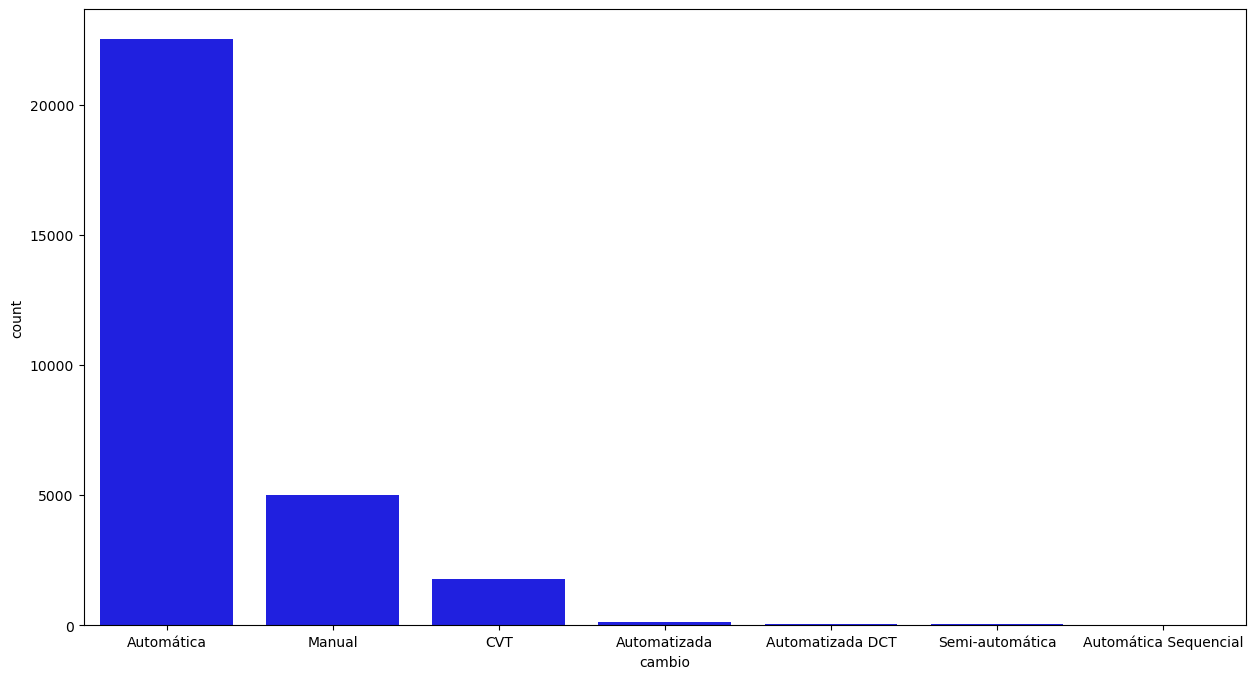

In [11]:
# Gráfico que representa a quantidade de câmbios
fig, axes = plt.subplots(figsize = (15, 8))
sns.countplot( x = 'cambio', data = df_train, color = 'blue', 
              order = df_train['cambio'].value_counts().index)

In [12]:
df_train.groupby(['modelo'])['id'].count().reset_index()

,modelo,id
0,116i,1
1,118i,2
2,120i,46
3,125i,4
4,130i,11
...,...,...
452,Z4,18
453,ZAFIRA,26
454,ZOE,3
455,i3,10


In [13]:
df_train['marca'].value_counts().reset_index()

,index,marca
0,VOLKSWAGEN,4594
1,CHEVROLET,3020
2,TOYOTA,2180
3,HYUNDAI,2043
4,JEEP,2000
5,FIAT,1918
6,BMW,1784
7,AUDI,1698
8,PEUGEOT,1675
9,HONDA,1586


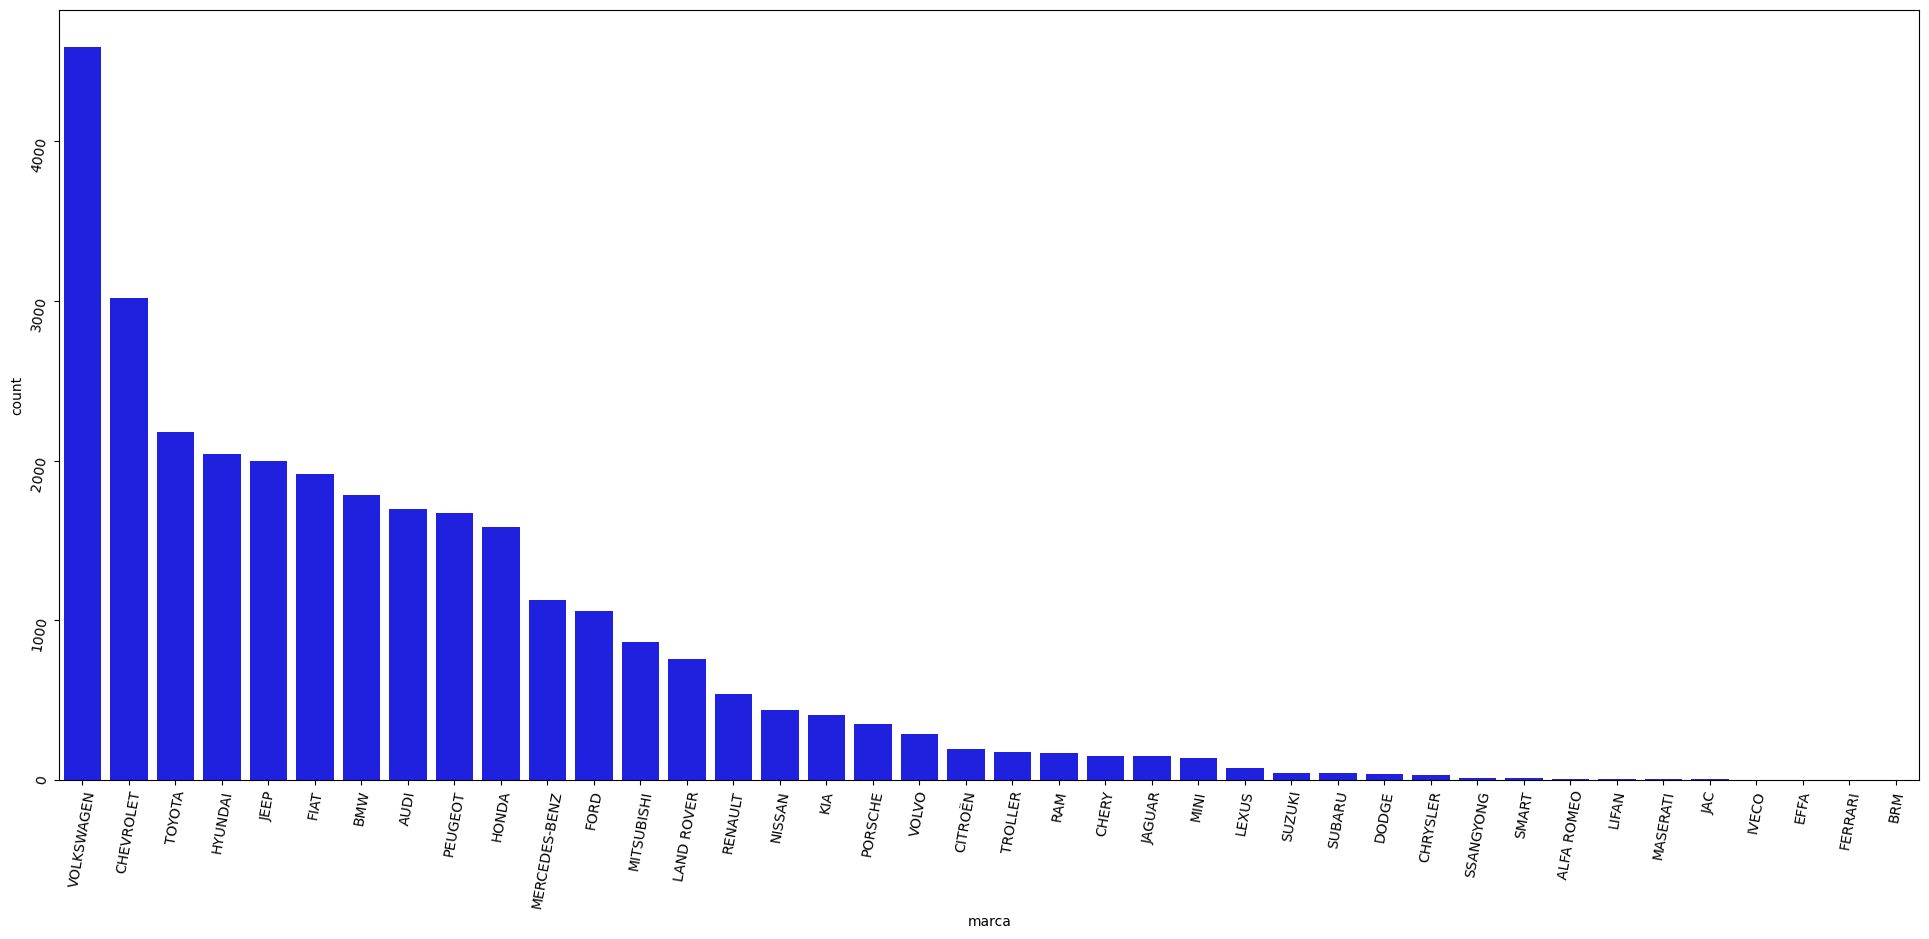

In [15]:
# Gráfico que representa a quantidade de cada marca de carro
fig, axes = plt.subplots(figsize = (24,10))
sns.countplot( x = 'marca', data = df_train, color = 'blue', 
              order = df_train['marca'].value_counts().index)

axes.tick_params(labelrotation=80)

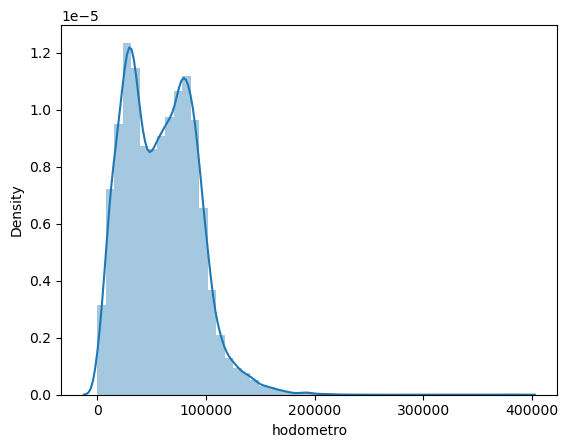

In [29]:
# Gráfico do odometro
sns.distplot(df_train["hodometro"], axlabel="hodometro");

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  int64  
 7   hodometro                29584 non-null  int64  
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [17]:
#Definindo o que seria um preço popular
percentiles = [0.10, 0.25, 0.5, 0.70, 0.90, 0.99]
df_train['preco'].quantile(percentiles).reset_index()


,index,preco
0,0.10,54443.658343
1,0.25,76571.768465
2,0.50,114355.797000
3,0.70,151285.882650
4,0.90,237865.189290
5,0.99,404070.246440


In [20]:
df_train.isnull().sum()

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
popular                        0
dtype: int

In [21]:
# Porcentagem de nullos
(df_train.isnull().sum()/(len(df_train)))*100


id                           0.000000
num_fotos                    0.598296
marca                        0.000000
modelo                       0.000000
versao                       0.000000
ano_de_fabricacao            0.000000
ano_modelo                   0.000000
hodometro                    0.000000
cambio                       0.000000
num_portas                   0.000000
tipo                         0.000000
blindado                     0.000000
cor                          0.000000
tipo_vendedor                0.000000
cidade_vendedor              0.000000
estado_vendedor              0.000000
anunciante                   0.000000
entrega_delivery             0.000000
troca                        0.000000
elegivel_revisao             0.000000
dono_aceita_troca           25.899135
veiculo_único_dono          64.768118
revisoes_concessionaria     68.996755
ipva_pago                   33.548540
veiculo_licenciado          46.234451
garantia_de_fábrica         85.245403
revisoes_den

In [23]:
df_train['revisoes_concessionaria_bool'] = np.where(((df_train['revisoes_concessionaria'] == 'Todas as revisões feitas pela concessionária')),1 , 0)
df_train['veiculo_único_dono_bool'] = np.where(((df_train['veiculo_único_dono'] == 'Único dono')),1 , 0)
df_train['ipva_pago_bool'] = np.where(((df_train['ipva_pago'] == 'IPVA pago')),1 , 0)
df_train['dono_aceita_troca_bool'] = np.where(((df_train['dono_aceita_troca'] == 'Aceita troca')),1 , 0)
df_train['troca_bool'] = np.where(((df_train['troca'] == True)),1 , 0)
df_train['garantia_de_fábrica_boll'] = np.where(((df_train['garantia_de_fábrica'] == 'Garantia de fábrica')),1 , 0)

In [123]:
# Q1

# Filtro por carros de marcas populares
marcas_populares = ['NISSAN', 'CHEVROLET', 'VOLKSWAGEN', 'FORD', 'FIAT', 'TOYOTA', 'HONDA']

df_populares = df_train[df_train['marca'].isin(marcas_populares)]
quantidade_por_estado = df_populares['estado_vendedor'].value_counts()
preco_medio_por_estado = df_populares.groupby('estado_vendedor')['preco'].mean()
caracteristicas_especificas = ['revisoes_concessionaria_bool', 'veiculo_único_dono_bool', 'ipva_pago_bool', 'troca_bool']
caracteristicas_por_estado = df_populares.groupby('estado_vendedor')[caracteristicas_especificas].sum()
maior_cidade_por_estado = df_populares.groupby('estado_vendedor')['cidade_vendedor'].apply(lambda x: x.value_counts().index[0])
condicoes_por_estado = df_populares.groupby('estado_vendedor')[['entrega_delivery', 'dono_aceita_troca_bool']].sum()

resultado = pd.DataFrame({
    'Quantidade de Carros': quantidade_por_estado,
    'Preço Médio': preco_medio_por_estado,
    'Revisões Concessionária': caracteristicas_por_estado['revisoes_concessionaria_bool'],
    'Veículo Único Dono': caracteristicas_por_estado['veiculo_único_dono_bool'],
    'IPVA Pago': caracteristicas_por_estado['ipva_pago_bool'],
    'Aceita Troca': caracteristicas_por_estado['troca_bool'],
    'Maior Cidade': maior_cidade_por_estado,
    'Entrega Delivery': condicoes_por_estado['entrega_delivery'],
    'Dono Aceita Troca': condicoes_por_estado['dono_aceita_troca_bool']
})

resultado = resultado.sort_values(by=['Preço Médio', 'Quantidade de Carros'], ascending=[True, False]).reset_index()
# resultado.rename(columns={"index":"Estado"})

resultado

,index,Quantidade de Carros,Preço Médio,Revisões Concessionária,Veículo Único Dono,IPVA Pago,Aceita Troca,Maior Cidade,Entrega Delivery,Dono Aceita Troca
0,Roraima (RR),2,63613.691190,0,0,0,0,Marituba,0,1
1,Amazonas (AM),40,74706.509806,5,24,20,9,Manaus,16,35
2,Paraíba (PB),79,89784.377947,0,24,44,5,Rio de Janeiro,13,79
3,Acre (AC),11,91000.985046,5,4,3,11,Rio Branco,11,11
4,Ceará (CE),35,95390.044912,2,16,31,0,Fortaleza,1,32
5,Espírito Santo (ES),16,98919.418609,7,7,10,0,Vitória,0,9
6,Pará (PA),34,101463.313091,13,29,34,0,Belém,1,27
7,Pernambuco (PE),154,101530.345233,10,28,37,40,Recife,61,144
8,Rio Grande do Norte (RN),43,103454.963468,8,12,26,0,Natal,0,38
9,Mato Grosso do Sul (MS),18,103533.270333,5,12,16,1,Campo Grande,1,10


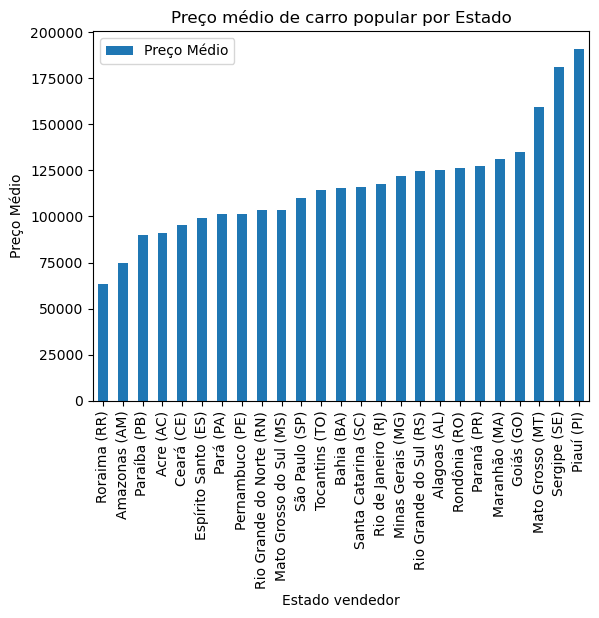

In [124]:
resultado.plot(x='index', y = 'Preço Médio', kind = 'bar')
plt.xlabel('Estado vendedor')
plt.ylabel('Preço Médio')
plt.title('Preço médio de carro popular por Estado')
plt.show()

In [52]:
# Q2 - Definição do melhor estado para comprar uma picape com transmissão automática
picape = df_train.query("cambio == 'Automática' and tipo == 'Picape'")
melhor_estado = picape.groupby('estado_vendedor').agg({
    'preco': 'mean',
    'id': 'count',
    'revisoes_concessionaria_bool': 'sum',
    'ano_de_fabricacao': 'mean',
    'ano_modelo': 'mean',
    'hodometro': 'mean',
    'veiculo_único_dono': 'first',
}).reset_index()

melhor_estado = melhor_estado.rename(columns={'id': 'qtd_disponivel', 'preco': 'preco_medio'})
melhor_estado.sort_values('preco_medio',ascending= True)

,estado_vendedor,preco_medio,qtd_disponivel,revisoes_concessionaria_bool,ano_de_fabricacao,ano_modelo,hodometro,veiculo_único_dono
8,Paraíba (PB),93157.035253,4,0,2019.500000,2020.000000,37034.500000,Único dono
5,Mato Grosso do Sul (MS),144700.247632,5,1,2013.200000,2014.200000,101569.600000,None
0,Acre (AC),145256.693662,6,4,2016.000000,2016.666667,75783.166667,Único dono
11,Rio Grande do Norte (RN),179961.694800,1,1,2019.000000,2020.000000,28398.000000,Único dono
13,Rio de Janeiro (RJ),181660.344686,318,107,2016.864780,2017.591195,61491.830189,Único dono
14,Santa Catarina (SC),185848.618545,283,85,2016.653710,2017.639576,59165.554770,Único dono
17,Tocantins (TO),187717.127533,3,2,2018.666667,2019.333333,52267.000000,Único dono
16,São Paulo (SP),188427.484637,1712,611,2016.884346,2017.794977,56197.060164,Único dono
9,Pernambuco (PE),192566.764506,14,4,2019.142857,2019.785714,35662.500000,Único dono
12,Rio Grande do Sul (RS),195251.763133,198,81,2016.439394,2017.515152,58099.388889,Único dono


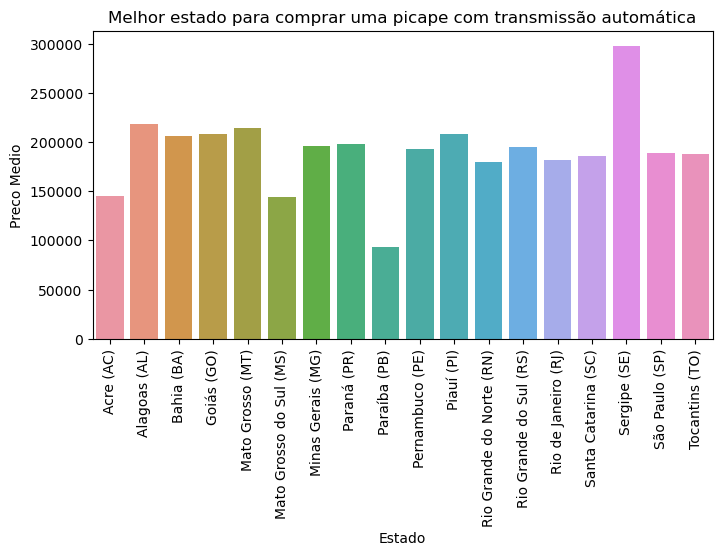

In [58]:
plt.figure(figsize=(8, 4))  # Define o tamanho da figura
sns.barplot(x='estado_vendedor', y='preco_medio', data=melhor_estado)
plt.xlabel('Estado')
plt.ylabel('Preco Medio')
plt.title('Melhor estado para comprar uma picape com transmissão automática')
plt.xticks(rotation=90)

plt.show()

In [26]:
# Q3 - Definição do melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica 

carros_garantia = df_train.query("garantia_de_fábrica_boll == True")
carros_garantia = carros_garantia.groupby('estado_vendedor').agg({
    'preco': 'mean',
    'id': 'count',
    'revisoes_concessionaria_bool': 'sum',
    'ano_de_fabricacao': 'mean',
    'ano_modelo': 'mean',
    'hodometro': 'mean',
    'veiculo_único_dono': 'first',
}).reset_index()

carros_garantia = carros_garantia.rename(columns={'id': 'qtd_disponivel', 'preco': 'preco_medio'})
carros_garantia.sort_values('preco_medio',ascending= True)

,estado_vendedor,preco_medio,qtd_disponivel,revisoes_concessionaria_bool,ano_de_fabricacao,ano_modelo,hodometro,veiculo_único_dono
11,Paraíba (PB),95762.746630,1,0,2021.000000,2022.000000,6046.000000,None
12,Pará (PA),98156.615279,17,13,2020.117647,2020.529412,25442.705882,Único dono
2,Amazonas (AM),99617.303340,9,9,2020.555556,2021.333333,13786.333333,Único dono
5,Espírito Santo (ES),104030.208124,9,8,2020.111111,2020.333333,28209.111111,Único dono
8,Mato Grosso do Sul (MS),121709.589842,13,6,2020.846154,2021.076923,10682.923077,Único dono
4,Ceará (CE),123939.878800,1,0,2021.000000,2022.000000,15491.000000,None
14,Rio Grande do Norte (RN),133120.393897,9,9,2019.666667,2020.444444,22768.888889,Único dono
13,Pernambuco (PE),149898.416932,20,19,2019.200000,2019.850000,30212.300000,Único dono
0,Acre (AC),150416.911340,2,2,2020.000000,2020.500000,36529.000000,Único dono
1,Alagoas (AL),154268.676542,58,45,2019.862069,2020.310345,22418.603448,Único dono


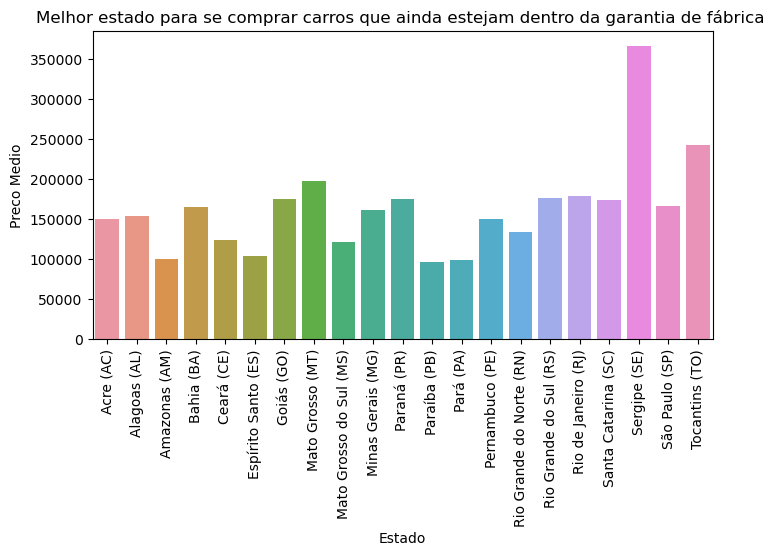

In [61]:
plt.figure(figsize=(8, 4))  # Define o tamanho da figura
sns.barplot(x='estado_vendedor', y='preco_medio', data=carros_garantia)
plt.xlabel('Estado')
plt.ylabel('Preco Medio')
plt.title('Melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica ')
plt.xticks(rotation=90)

plt.show()

In [75]:
#  Qual o estado com a menor quilometragem média nos carros disponíveis para compra?

estado_menor_quilometragem = df_train.groupby('estado_vendedor')['hodometro'].mean().idxmin()
estado_menor_quilometragem

'Piauí (PI)'

In [80]:
# Qual o estado com a maior quantidade de carros anunciados por pessoa física?
estado_maior_qtd_pf = df_train[df_train['tipo_vendedor'] == 'PF']['estado_vendedor'].value_counts().idxmax()
estado_maior_qtd_pf

'São Paulo (SP)'

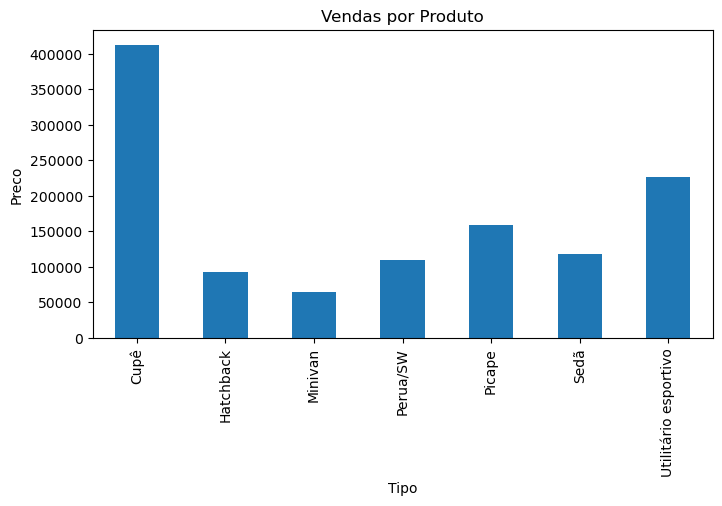

In [170]:
# Qual é a média de preço dos carros por tipo de veículo ?

media_preco_por_tipo = df_train.groupby('tipo')['preco'].mean()

plt.figure(figsize=(8, 4))
media_preco_por_tipo.plot(kind='bar')
plt.xlabel('Tipo')
plt.ylabel('Preco')
plt.title('Vendas por Produto')
plt.show()
